# Choropleths

In [2]:
import geopandas as gpd
from pysal.lib import examples
import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import numpy as np
import matplotlib.pyplot as plt

In [3]:
examples.explain('mexico')

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [4]:
mx = examples.load_example('mexico')

In [5]:
mx.get_file_list()

['/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/examples/mexico/mexicojoin.dbf',
 '/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/examples/mexico/mexico.gal',
 '/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/examples/mexico/mexico.csv',
 '/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/examples/mexico/mexicojoin.shx',
 '/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/examples/mexico/mexicojoin.shp',
 '/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/examples/mexico/README.md',
 '/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/examples/mexico/mexicojoin.prj']

In [6]:
gdf = gpd.read_file(examples.get_path('mexicojoin.shp'))

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POLY_ID     32 non-null     int64   
 1   AREA        32 non-null     float64 
 2   CODE        32 non-null     object  
 3   NAME        32 non-null     object  
 4   PERIMETER   32 non-null     float64 
 5   ACRES       32 non-null     float64 
 6   HECTARES    32 non-null     float64 
 7   PCGDP1940   32 non-null     float64 
 8   PCGDP1950   32 non-null     float64 
 9   PCGDP1960   32 non-null     float64 
 10  PCGDP1970   32 non-null     float64 
 11  PCGDP1980   32 non-null     float64 
 12  PCGDP1990   32 non-null     float64 
 13  PCGDP2000   32 non-null     float64 
 14  HANSON03    32 non-null     float64 
 15  HANSON98    32 non-null     float64 
 16  ESQUIVEL99  32 non-null     float64 
 17  INEGI       32 non-null     float64 
 18  INEGI2      32 non-null     float64 
 19  MA

In [9]:
gdf.crs = 'EPSG:4326'
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


In [12]:
gdf['INEGI']

0     1.0
1     1.0
2     4.0
3     4.0
4     4.0
5     4.0
6     3.0
7     3.0
8     4.0
9     3.0
10    3.0
11    4.0
12    3.0
13    5.0
14    5.0
15    3.0
16    5.0
17    3.0
18    5.0
19    5.0
20    5.0
21    5.0
22    1.0
23    1.0
24    2.0
25    1.0
26    1.0
27    4.0
28    4.0
29    2.0
30    2.0
31    5.0
Name: INEGI, dtype: float64

<Axes: >

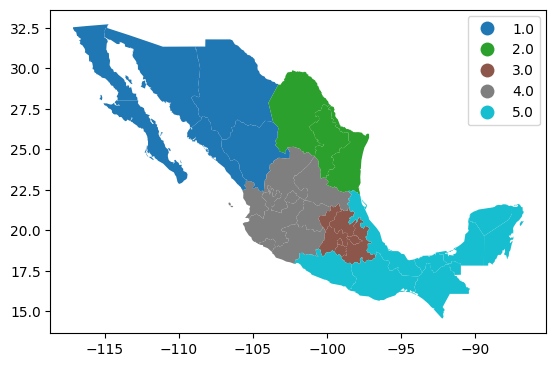

In [10]:
gdf.plot(
    column='INEGI',
    categorical=True,
    legend=True
)

In [13]:
gdf['PCGDP2000']

0     29855.0
1     26103.0
2     11478.0
3     21610.0
4     27782.0
5     15585.0
6     26149.0
7     12348.0
8     11838.0
9     16322.0
10    54349.0
11    21358.0
12    18170.0
13    17509.0
14    36163.0
15    15685.0
16    33442.0
17    11701.0
18    11820.0
19     9010.0
20    13360.0
21     8684.0
22    24068.0
23    30735.0
24    28460.0
25    15242.0
26    17379.0
27    11130.0
28    15866.0
29    38672.0
30    23546.0
31    12191.0
Name: PCGDP2000, dtype: float64

<Axes: >

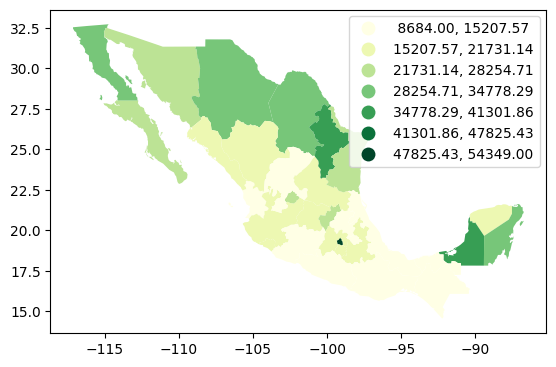

In [15]:
gdf.plot(
    column="PCGDP2000", 
    scheme="equal_interval", 
    k=7,  # number of colors
    cmap="YlGn",
    legend=True
)

<Axes: >

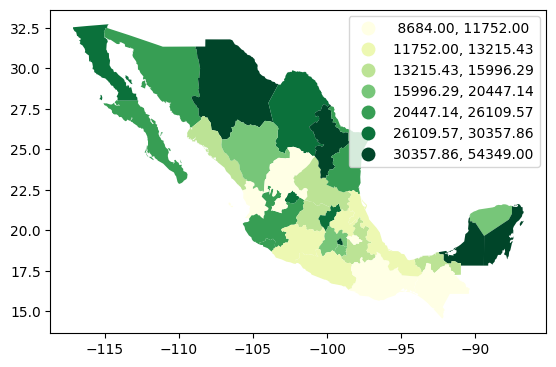

In [16]:
gdf.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=True
)

<Axes: >

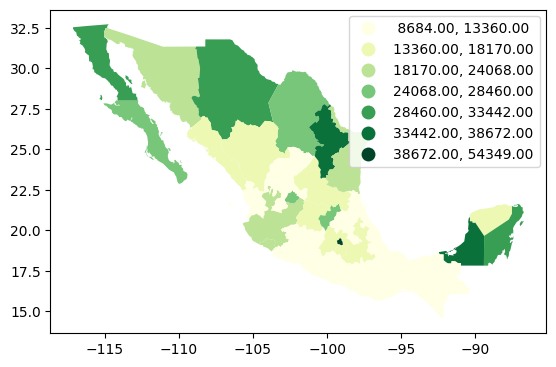

In [17]:
gdf.plot(
    column="PCGDP2000", 
    scheme="fisher_jenks", 
    k=7,
    cmap="YlGn",
    legend=True
)

<Axes: >

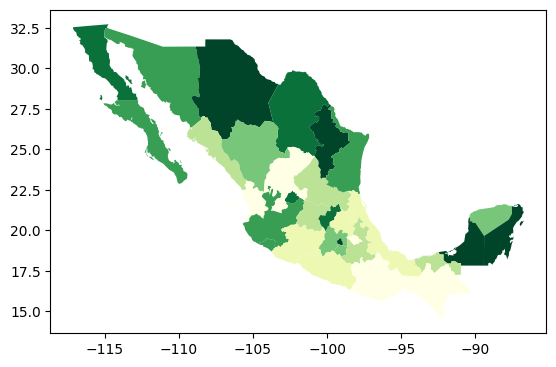

In [18]:
gdf.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=False
)